### Brain Stroke Prediction

In [89]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#Loading dataset
df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [91]:
##Understanding the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [92]:
df['stroke'].unique()

array([0, 1], dtype=int64)

###### Here 0: "Not stroke" and 1:"Stroke"

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [94]:
df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [96]:
##Checking Missing Values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###### There are no missinng values

In [97]:
###Checking Duplicate values
df.duplicated().sum()

0

#### Data Cleaning

In [98]:
sorted(df['age'].unique())

[0.08,
 0.16,
 0.24,
 0.32,
 0.4,
 0.48,
 0.56,
 0.64,
 0.68,
 0.72,
 0.8,
 0.88,
 1.0,
 1.08,
 1.16,
 1.24,
 1.3,
 1.32,
 1.4,
 1.48,
 1.56,
 1.64,
 1.72,
 1.8,
 1.88,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0]

In [99]:
###As Age values are in decimals with certain non acceptable age values ...so we need to round them up in both train and test dataseet.

df['age'] = np.ceil(df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [100]:
sorted(df['age'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0]

In [101]:
df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [102]:
##As other category has only one record...so dropping that record.
df.drop(df[df['gender']=='Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index, inplace=True)

#### Exploratory Data Analysis

In [103]:
##Descriptive Statistics

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000
mean,7651.388159,41.432334,0.049729,0.023329,89.039396,28.113382,0.041299
std,4418.151289,21.420411,0.217391,0.150950,25.476872,6.722038,0.198988
min,0.000000,1.000000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.500000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.000000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.500000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


#### Univariate Analysis

In [104]:
##Firstly Analysing Target or dependent feture----> Stroke Column

In [105]:
##Filtering stroke and no stroke data

no_stroke= df[df['stroke'] == 0 ]
stroke= df[df['stroke'] == 1 ]

In [106]:
stroke_count =df['stroke'].value_counts()

Text(0.5, 1.0, 'Proportion of Stroke Class')

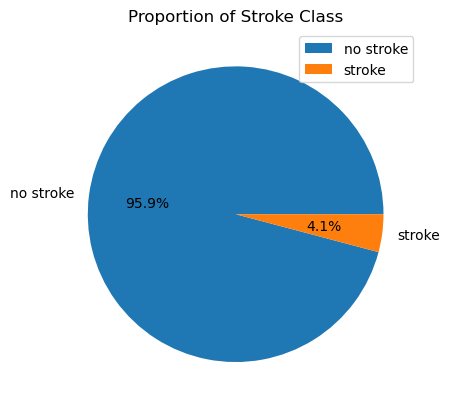

In [107]:
plt.pie(stroke_count, labels=['no stroke', 'stroke'], autopct='%1.1f%%')
plt.legend()
plt.title('Proportion of Stroke Class')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15303 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15303 non-null  int64  
 1   gender             15303 non-null  object 
 2   age                15303 non-null  float64
 3   hypertension       15303 non-null  int64  
 4   heart_disease      15303 non-null  int64  
 5   ever_married       15303 non-null  object 
 6   work_type          15303 non-null  object 
 7   Residence_type     15303 non-null  object 
 8   avg_glucose_level  15303 non-null  float64
 9   bmi                15303 non-null  float64
 10  smoking_status     15303 non-null  object 
 11  stroke             15303 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.5+ MB


In [109]:
#Numerical Features 
num_features=['age','avg_glucose_level','bmi']


Univariate Analysis: Numerical Features

age
count    15303.000000
mean        41.432334
std         21.420411
min          1.000000
25%         26.000000
50%         43.000000
75%         57.000000
max         82.000000
Name: age, dtype: float64
Skewness: -0.10
Kurtosis: -0.81


d:\Python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


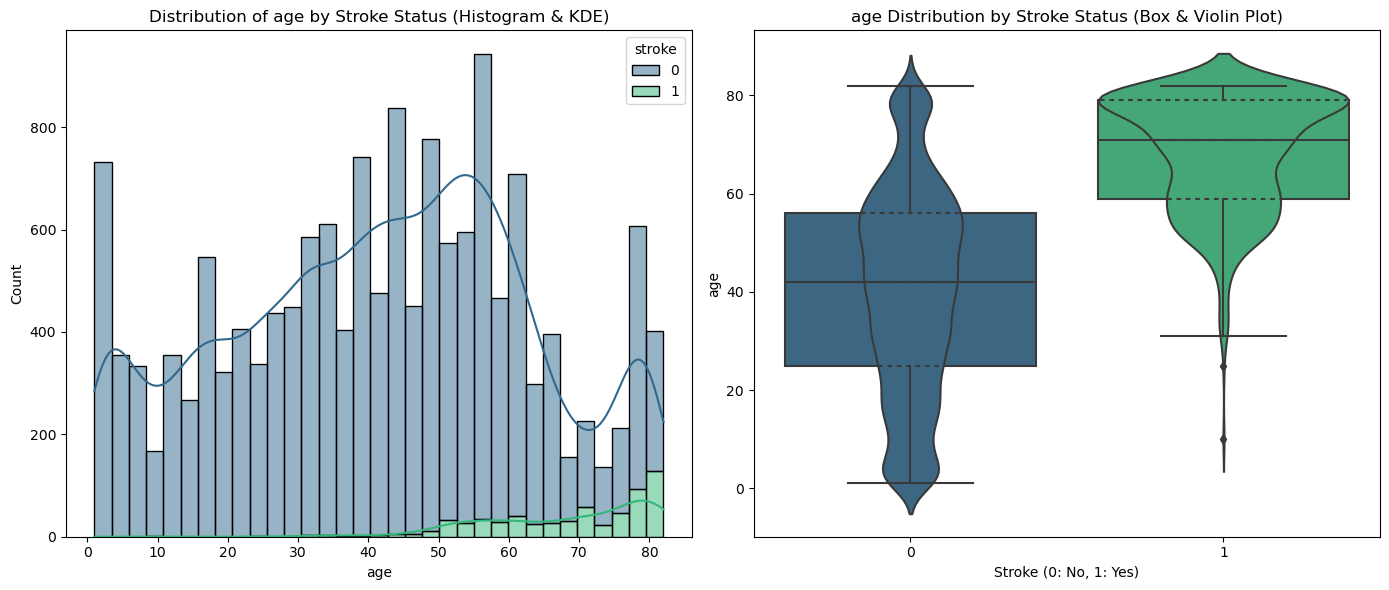


avg_glucose_level
count    15303.000000
mean        89.039396
std         25.476872
min         55.220000
25%         74.900000
50%         85.120000
75%         96.980000
max        267.600000
Name: avg_glucose_level, dtype: float64
Skewness: 3.04
Kurtosis: 13.18


d:\Python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


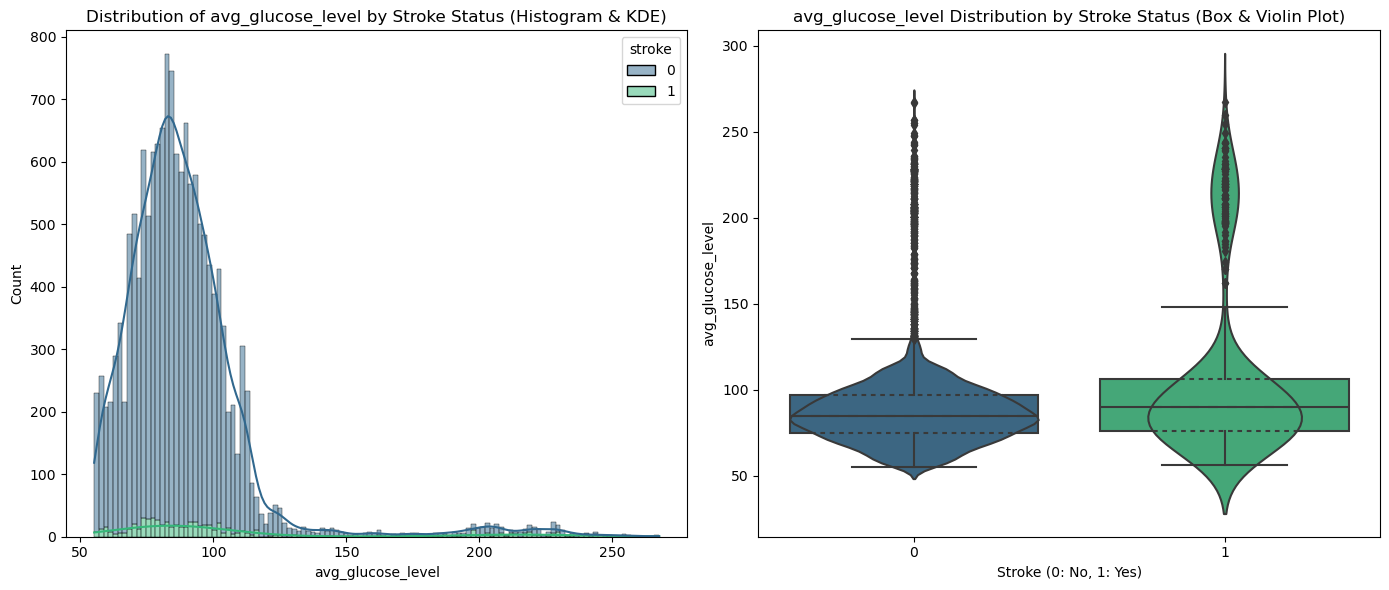


bmi
count    15303.000000
mean        28.113382
std          6.722038
min         10.300000
25%         23.500000
50%         27.600000
75%         32.000000
max         80.100000
Name: bmi, dtype: float64
Skewness: 0.71
Kurtosis: 1.36


d:\Python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


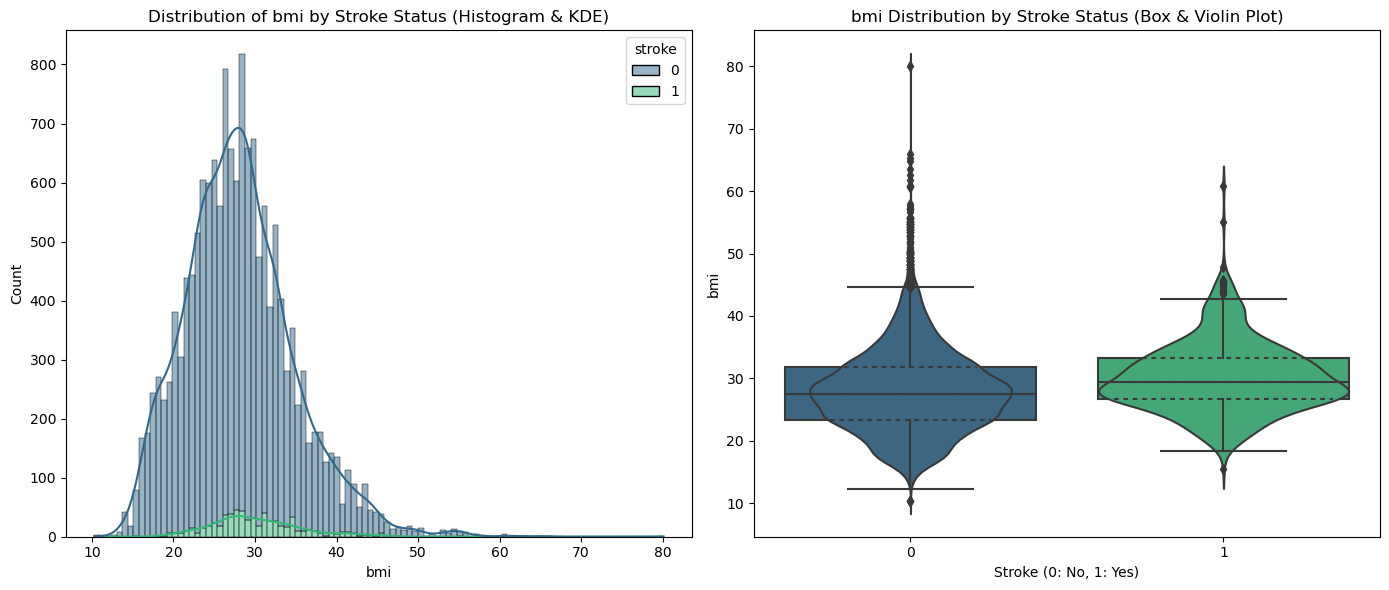

In [110]:
print("\nUnivariate Analysis: Numerical Features")
for feature in num_features:
    print(f"\n{feature}")

    # Descriptive Statistics (including skewness and kurtosis)
    print(df[feature].describe())
    print(f"Skewness: {df[feature].skew():.2f}")
    print(f"Kurtosis: {df[feature].kurt():.2f}")

    plt.figure(figsize=(14, 6))

    # Histogram and KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, kde=True, hue='stroke', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {feature} by Stroke Status (Histogram & KDE)')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Box Plot and Violin Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='stroke', y=feature, palette='viridis')
    sns.violinplot(data=df, x='stroke', y=feature, inner='quartile', palette='viridis', alpha=0.6) # Add violin for density view
    plt.title(f'{feature} Distribution by Stroke Status (Box & Violin Plot)')
    plt.xlabel('Stroke (0: No, 1: Yes)')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

In [111]:
print("Age (after np.ceil):")
print("-Mean age is ~41.4 years, with a wide range (1-82), showing a near-symmetrical distribution.")
print("-Stroke cases significantly increase with age, evident by the KDE plot's shift towards higher values for stroke patients.")
print("-The median age for stroke patients is notably higher compared to non-stroke patients.")
print("-Some younger age outliers exist within the stroke group, warranting further investigation.\n")

print("Average Glucose Level:")
print("-Mean glucose is ~89.04, but the distribution is highly right-skewed with significant high-end outliers (Kurtosis 13.18).")
print("-Individuals with higher glucose levels are disproportionately affected by stroke.")
print("-The KDE for stroke patients extends considerably into higher glucose ranges.")
print("-Median and upper quartile glucose levels are markedly elevated in the stroke group, with many high outliers.\n")

print("BMI:")
print("-Mean BMI is ~28.11, with a moderate right skew and some high outliers.")
print("-The BMI distribution is broadly similar for both stroke and non-stroke groups.")
print("-However, stroke patients show a slight tendency towards higher median BMI values.")
print("-While high BMI outliers exist in both groups, their presence might be more critical in stroke cases.")


Age (after np.ceil):
-Mean age is ~41.4 years, with a wide range (1-82), showing a near-symmetrical distribution.
-Stroke cases significantly increase with age, evident by the KDE plot's shift towards higher values for stroke patients.
-The median age for stroke patients is notably higher compared to non-stroke patients.
-Some younger age outliers exist within the stroke group, warranting further investigation.

Average Glucose Level:
-Mean glucose is ~89.04, but the distribution is highly right-skewed with significant high-end outliers (Kurtosis 13.18).
-Individuals with higher glucose levels are disproportionately affected by stroke.
-The KDE for stroke patients extends considerably into higher glucose ranges.
-Median and upper quartile glucose levels are markedly elevated in the stroke group, with many high outliers.

BMI:
-Mean BMI is ~28.11, with a moderate right skew and some high outliers.
-The BMI distribution is broadly similar for both stroke and non-stroke groups.
-However, 

In [112]:
### Categorical Features
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


Univariate Analysis: Categorical Features

Analyzing: gender
Value Counts:
gender
Female    9446
Male      5857
Name: count, dtype: int64
Value Percentages:
gender
Female    61.726459
Male      38.273541
Name: proportion, dtype: float64


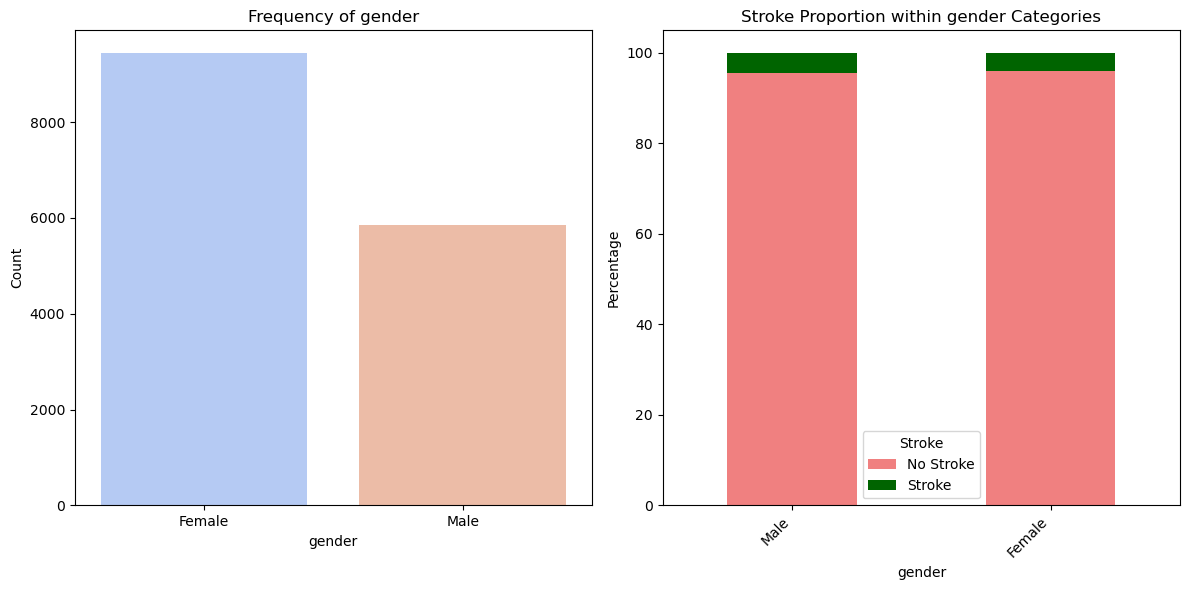


Analyzing: hypertension
Value Counts:
hypertension
0    14542
1      761
Name: count, dtype: int64
Value Percentages:
hypertension
0    95.027119
1     4.972881
Name: proportion, dtype: float64


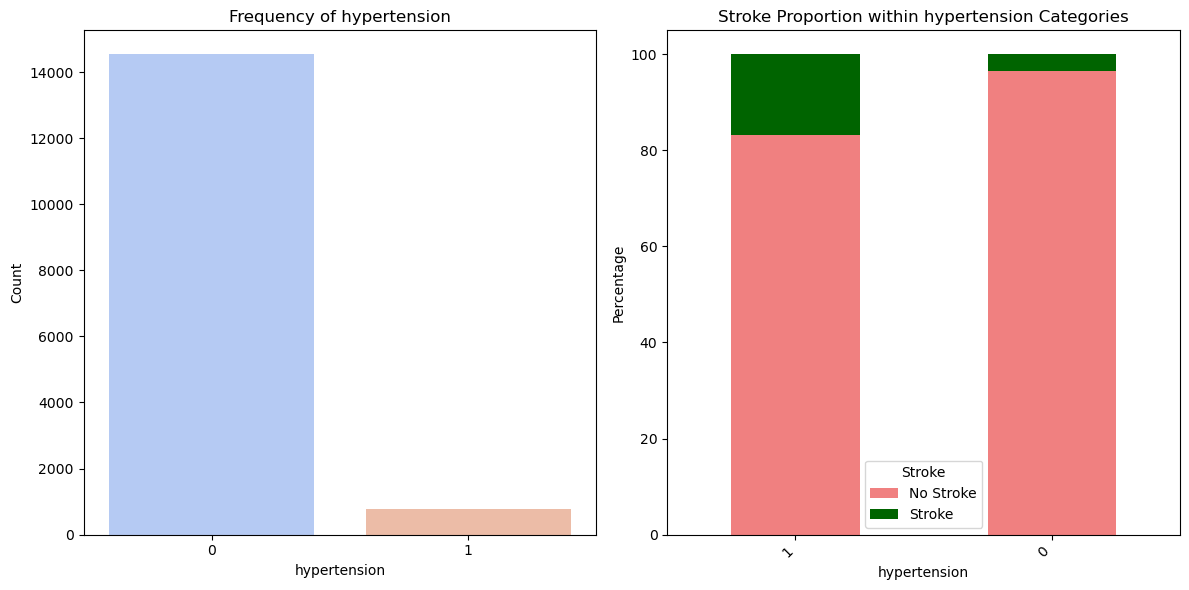


Analyzing: heart_disease
Value Counts:
heart_disease
0    14946
1      357
Name: count, dtype: int64
Value Percentages:
heart_disease
0    97.667124
1     2.332876
Name: proportion, dtype: float64


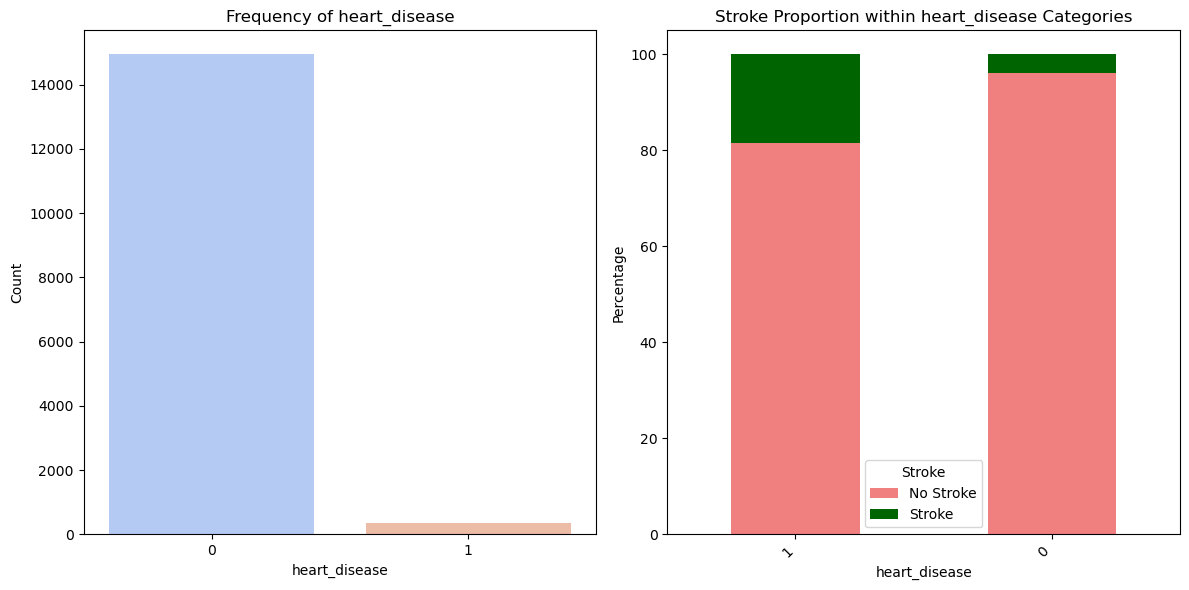


Analyzing: ever_married
Value Counts:
ever_married
Yes    10385
No      4918
Name: count, dtype: int64
Value Percentages:
ever_married
Yes    67.862511
No     32.137489
Name: proportion, dtype: float64


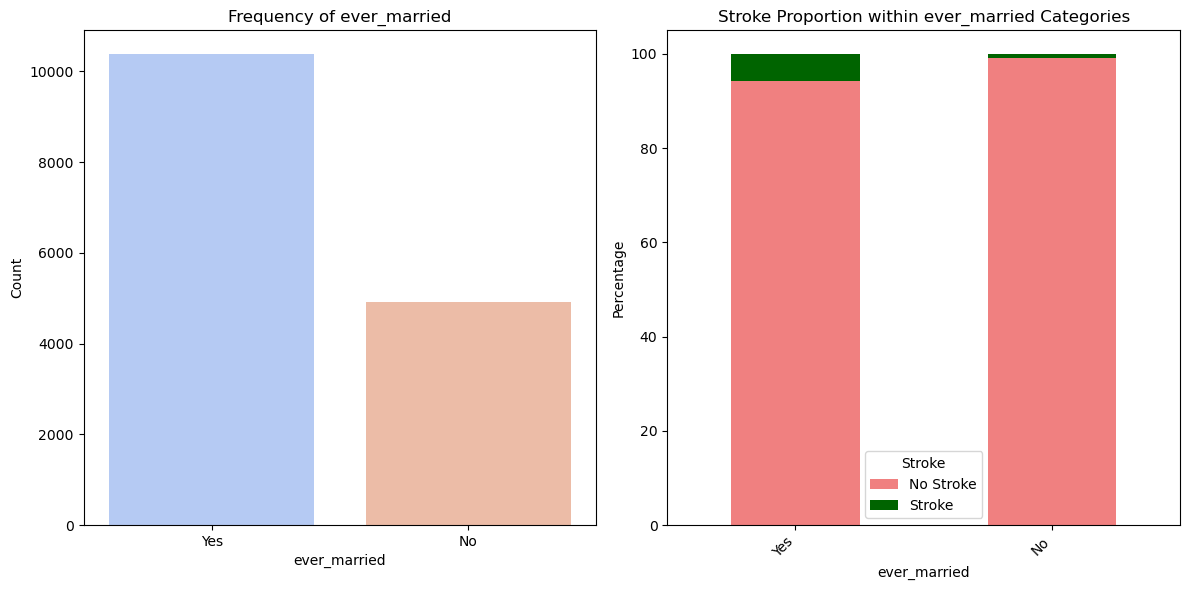


Analyzing: work_type
Value Counts:
work_type
Private          9752
children         2037
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: count, dtype: int64
Value Percentages:
work_type
Private          63.726067
children         13.311115
Self-employed    12.670718
Govt_job         10.017644
Never_worked      0.274456
Name: proportion, dtype: float64


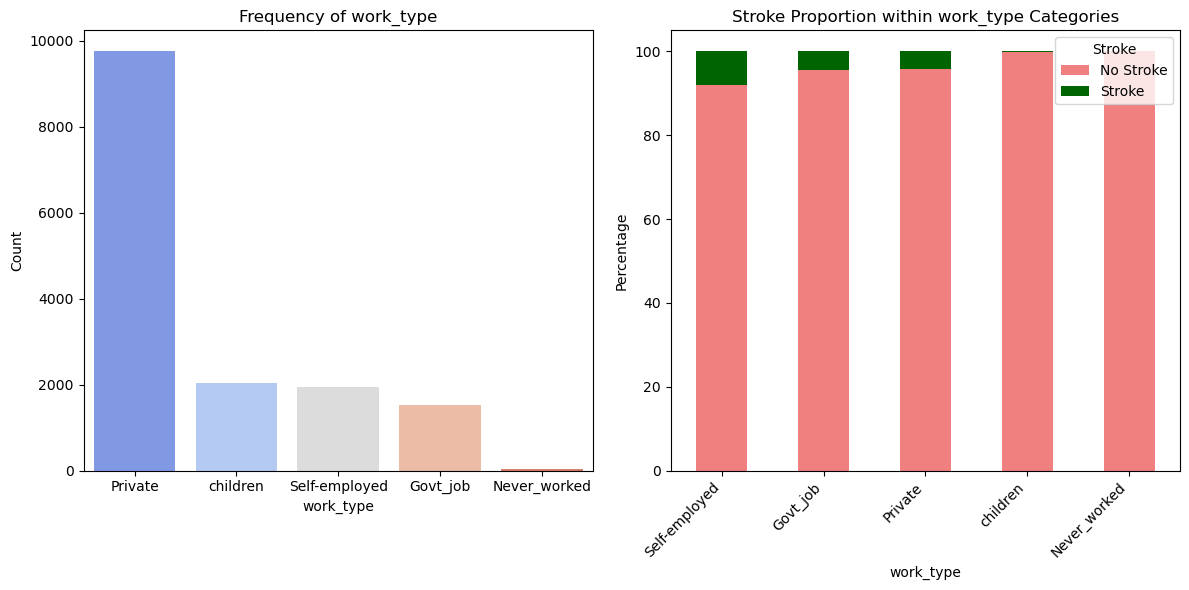


Analyzing: Residence_type
Value Counts:
Residence_type
Rural    7663
Urban    7640
Name: count, dtype: int64
Value Percentages:
Residence_type
Rural    50.075149
Urban    49.924851
Name: proportion, dtype: float64


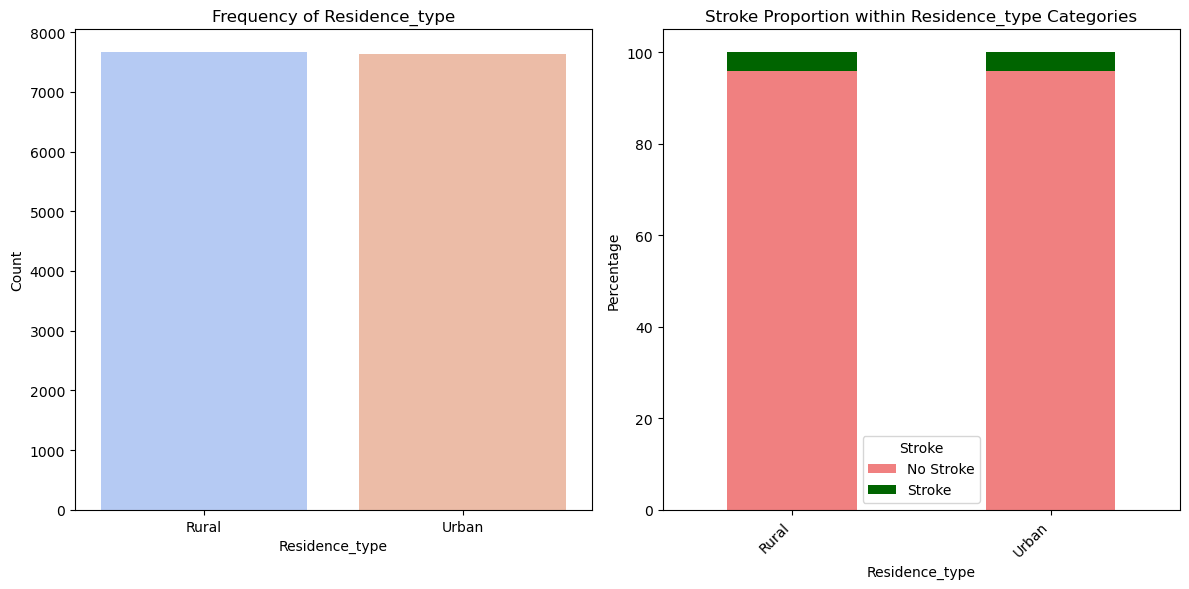


Analyzing: smoking_status
Value Counts:
smoking_status
never smoked       6281
Unknown            4542
formerly smoked    2337
smokes             2143
Name: count, dtype: int64
Value Percentages:
smoking_status
never smoked       41.044240
Unknown            29.680455
formerly smoked    15.271515
smokes             14.003790
Name: proportion, dtype: float64


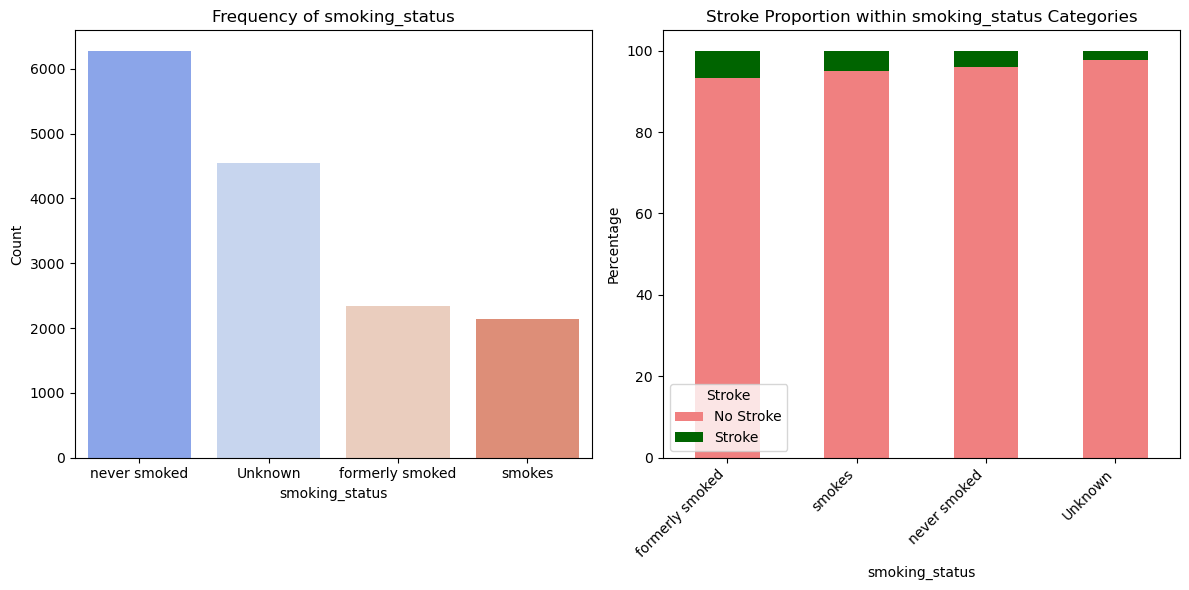

In [113]:
print("\nUnivariate Analysis: Categorical Features")
for feature in cat_features:
    print(f"\nAnalyzing: {feature}")

    # Frequency Analysis
    print("Value Counts:")
    print(df[feature].value_counts())
    print("Value Percentages:")
    print(df[feature].value_counts(normalize=True) * 100)

    plt.figure(figsize=(12, 6))

    # Count Plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=feature, palette='coolwarm', order=df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
   

    # Proportional Stacked Bar Chart by Stroke Status
    plt.subplot(1, 2, 2)
    # Calculate proportions
    prop_df = df.groupby(feature)['stroke'].value_counts(normalize=True).unstack().mul(100)
    prop_df = prop_df.sort_values(by=1, ascending=False) # Sort by proportion of stroke=1

    prop_df.plot(kind='bar', stacked=True, color=['lightcoral', 'darkgreen'], ax=plt.gca())
    plt.title(f'Stroke Proportion within {feature} Categories')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

    plt.tight_layout()
    plt.show()

In [114]:
print("Gender:")
print("Females constitute the majority (61.73%) of the dataset, with males making up 38.27%.")
print("The single 'Other' gender category was excluded due to its rarity.")
print("Stroke proportion appears marginally higher in males, though the overall stroke rate is low for both.")
print("Gender's individual predictive power for stroke seems limited based on this univariate view.\n")

print("Hypertension:")
print("The dataset is highly imbalanced for hypertension: 95.03% have no hypertension, 4.97% do.")
print("Individuals with hypertension (1) show a significantly elevated proportion of stroke cases.")
print("This feature stands out as a strong potential predictor for stroke.")
print("Its imbalance necessitates careful evaluation using metrics like precision and recall.\n")

print("Heart Disease:")
print("Similar to hypertension, heart disease is highly imbalanced: 97.67% have no heart disease, 2.33% do.")
print("Individuals with existing heart disease (1) exhibit a considerably higher proportion of stroke cases.")
print("This is another strong potential predictor, similar in impact to hypertension.")
print("The extreme imbalance requires robust handling during modeling and evaluation.\n")

print("Ever Married:")
print("The majority (67.86%) of individuals have been married, while 32.14% have not.")
print("People who have ever been married (`Yes`) show a slightly higher proportion of stroke cases.")
print("This suggests a possible, though not extremely strong, association with stroke.")
print("This feature could indicate lifestyle or age-related factors indirectly.\n")

print("Work Type:")
print("'Private' is the most common work type (63.73%), with 'children' and 'Self-employed' also notable.")
print("'Never_worked' is a very rare category (0.27%).")
print("'Self-employed' and 'Govt_job' categories have higher proportions of stroke cases.")
print("'Children' and 'Never_worked' show very low or zero stroke rates, as expected due to age.\n")

print("Residence Type:")
print("The dataset is nearly balanced between 'Rural' (50.08%) and 'Urban' (49.92%) residence types.")
print("The proportion of stroke cases is very similar across both 'Rural' and 'Urban' categories.")
print("This suggests 'Residence_type' may not be a strong individual predictor of stroke.")
print("It indicates minimal direct impact on stroke probability in this dataset.\n")

print("Smoking Status:")
print("'never smoked' is the largest group (41.04%), but a significant 'Unknown' category exists (29.68%).")
print("'formerly smoked' individuals have the highest proportion of stroke cases, followed by 'smokes'.")
print("The 'Unknown' category's stroke proportion falls between 'never smoked' and 'smokes'/'formerly smoked'.")
print("The 'Unknown' status needs a strategy (e.g., imputation, treating as a separate category) for modeling.")


Gender:
Females constitute the majority (61.73%) of the dataset, with males making up 38.27%.
The single 'Other' gender category was excluded due to its rarity.
Stroke proportion appears marginally higher in males, though the overall stroke rate is low for both.
Gender's individual predictive power for stroke seems limited based on this univariate view.

Hypertension:
The dataset is highly imbalanced for hypertension: 95.03% have no hypertension, 4.97% do.
Individuals with hypertension (1) show a significantly elevated proportion of stroke cases.
This feature stands out as a strong potential predictor for stroke.
Its imbalance necessitates careful evaluation using metrics like precision and recall.

Heart Disease:
Similar to hypertension, heart disease is highly imbalanced: 97.67% have no heart disease, 2.33% do.
Individuals with existing heart disease (1) exhibit a considerably higher proportion of stroke cases.
This is another strong potential predictor, similar in impact to hyperten


Bivariate and Multivariate Analysis

I. Numerical vs. Numerical Features

Generating Pair Plot (numerical features vs. each other, colored by Stroke)...


d:\Python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Python3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


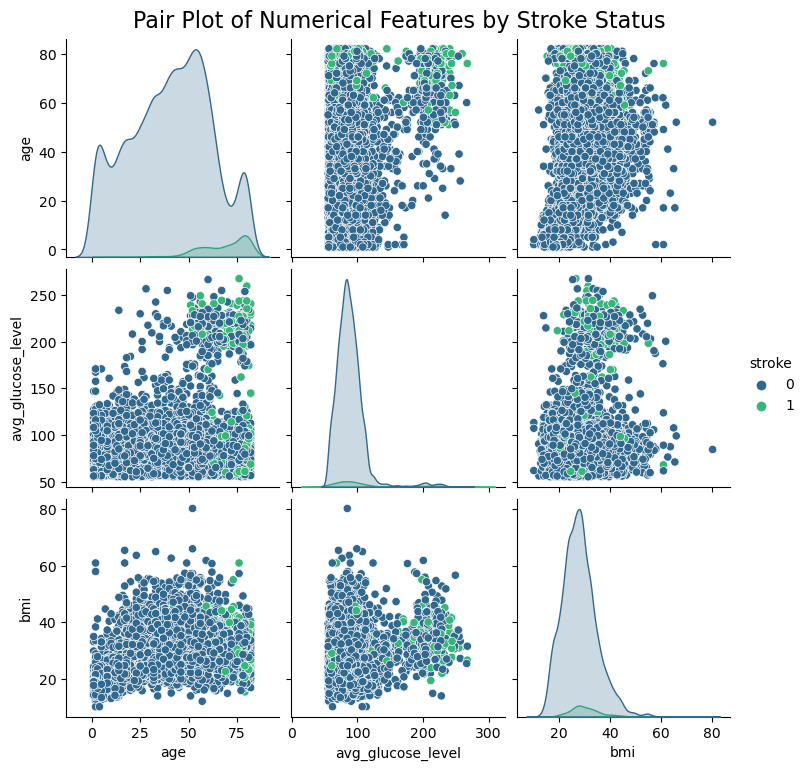

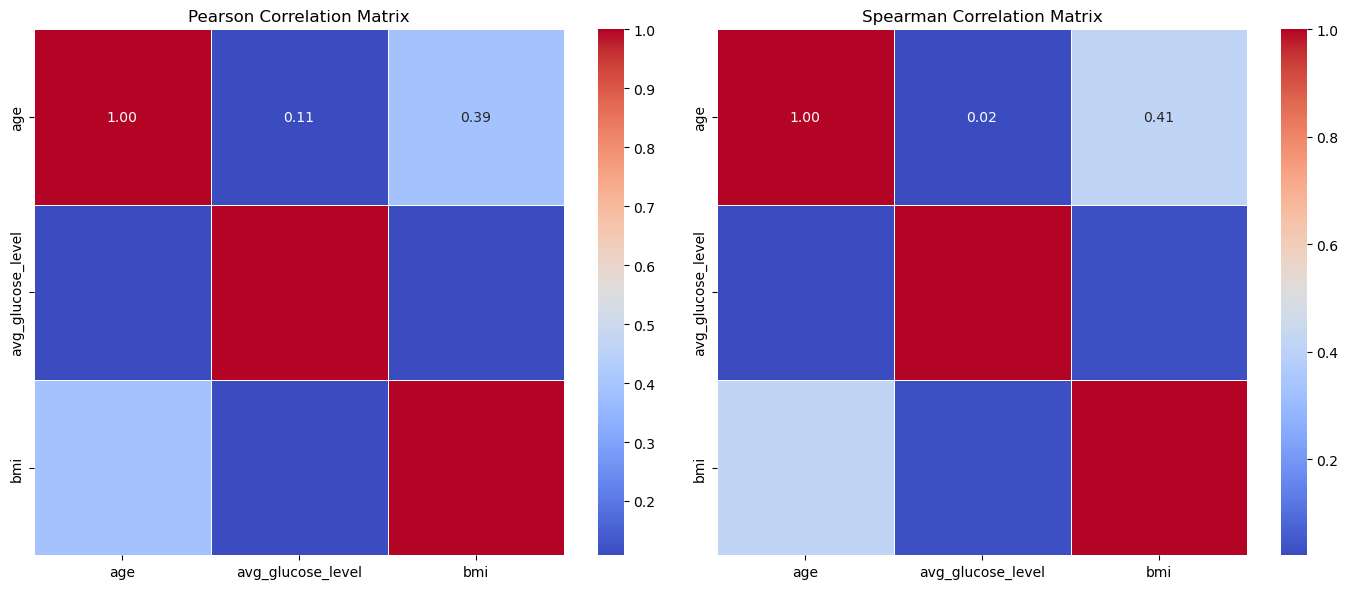


### II. Numerical vs. Categorical Features (Grouped by Stroke)


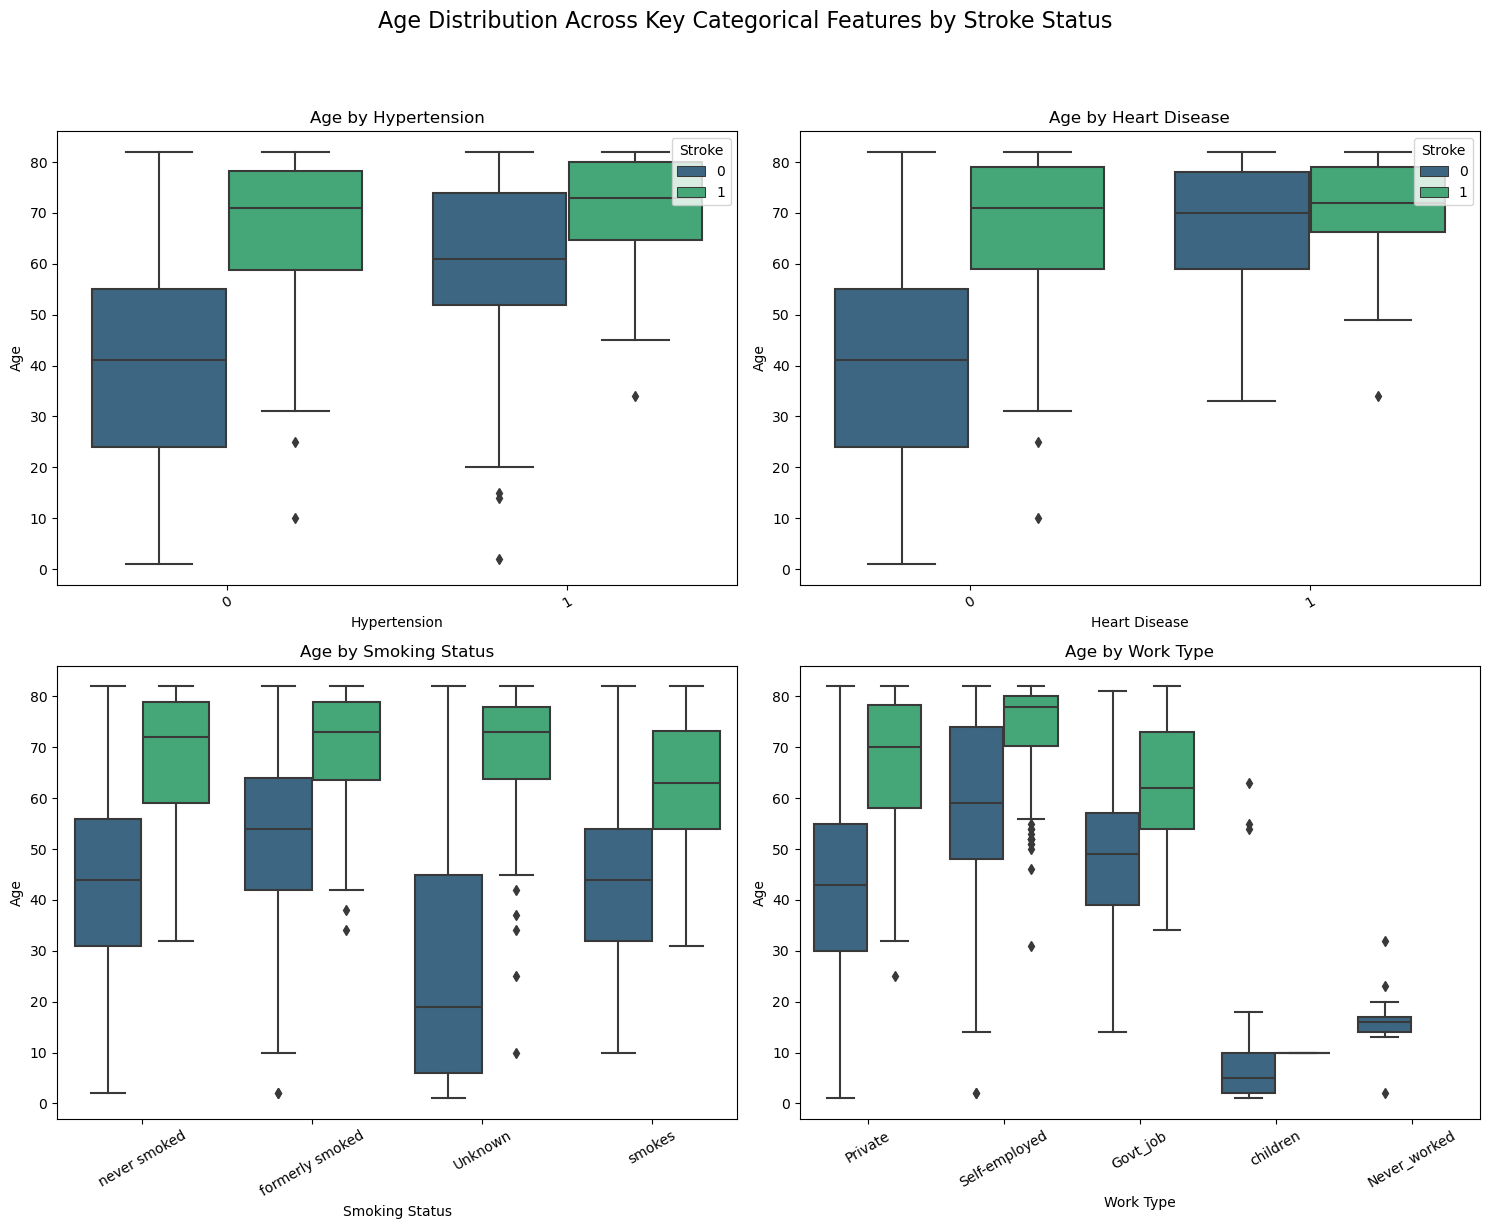

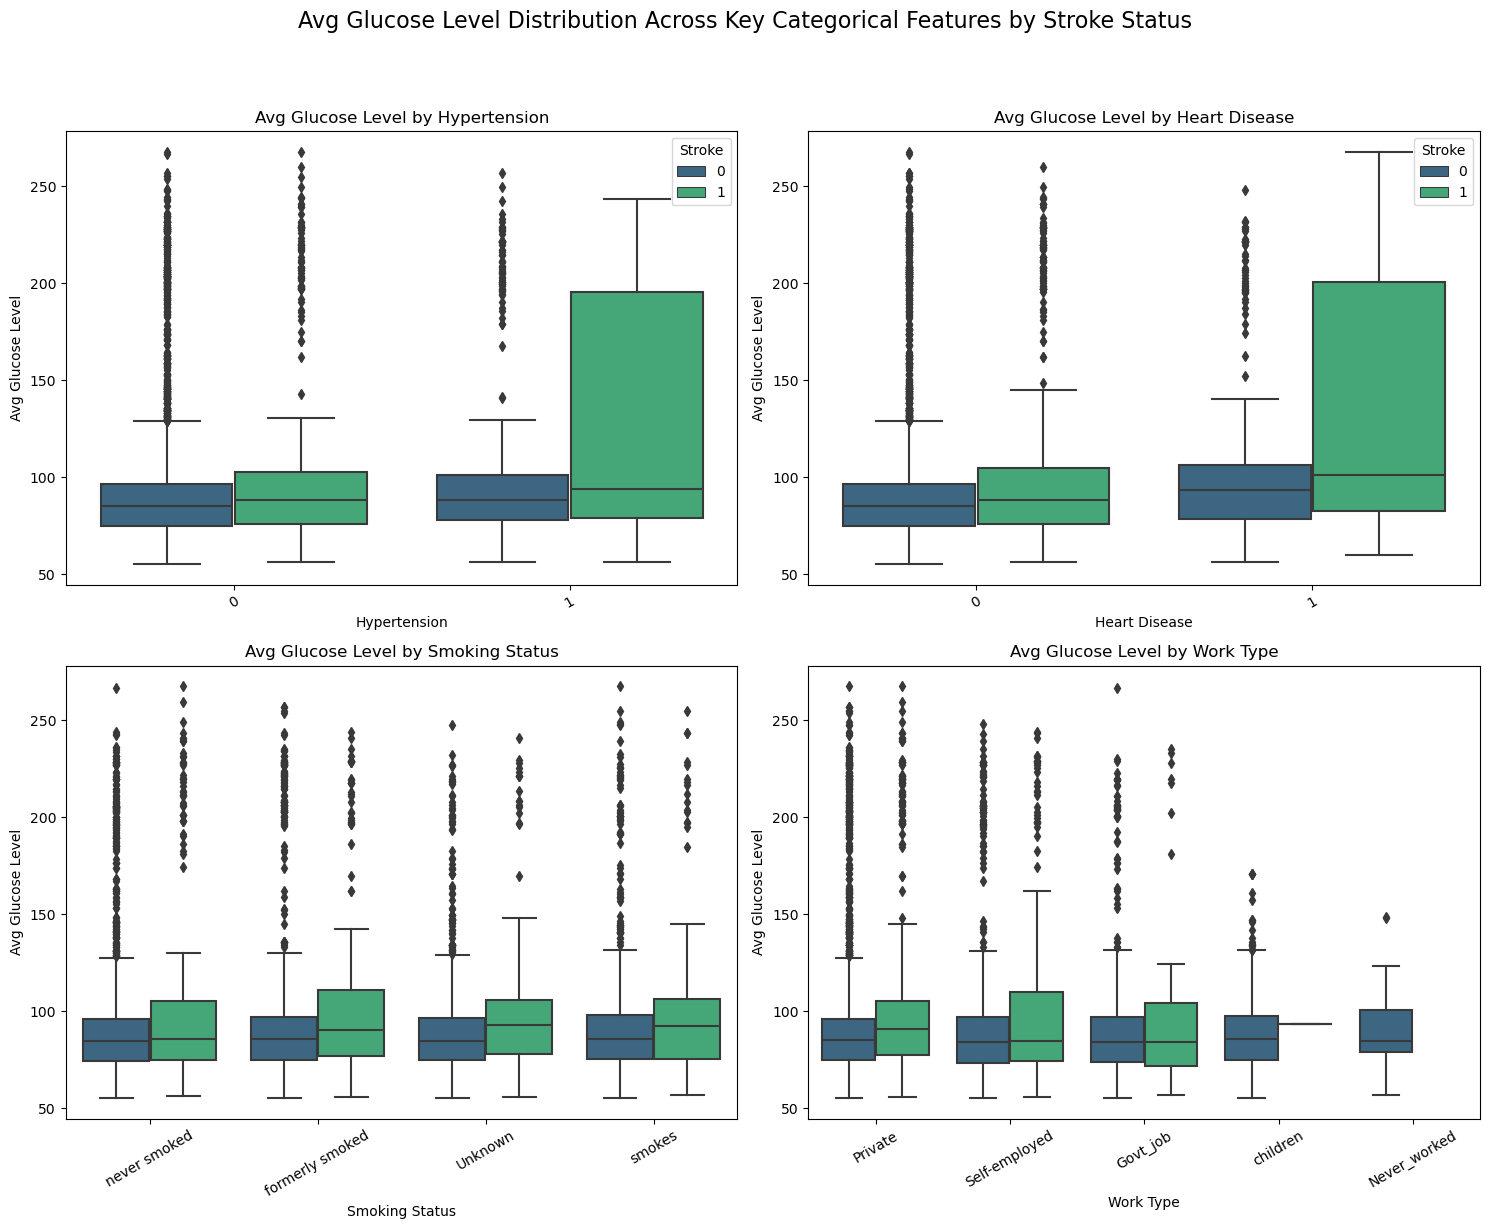

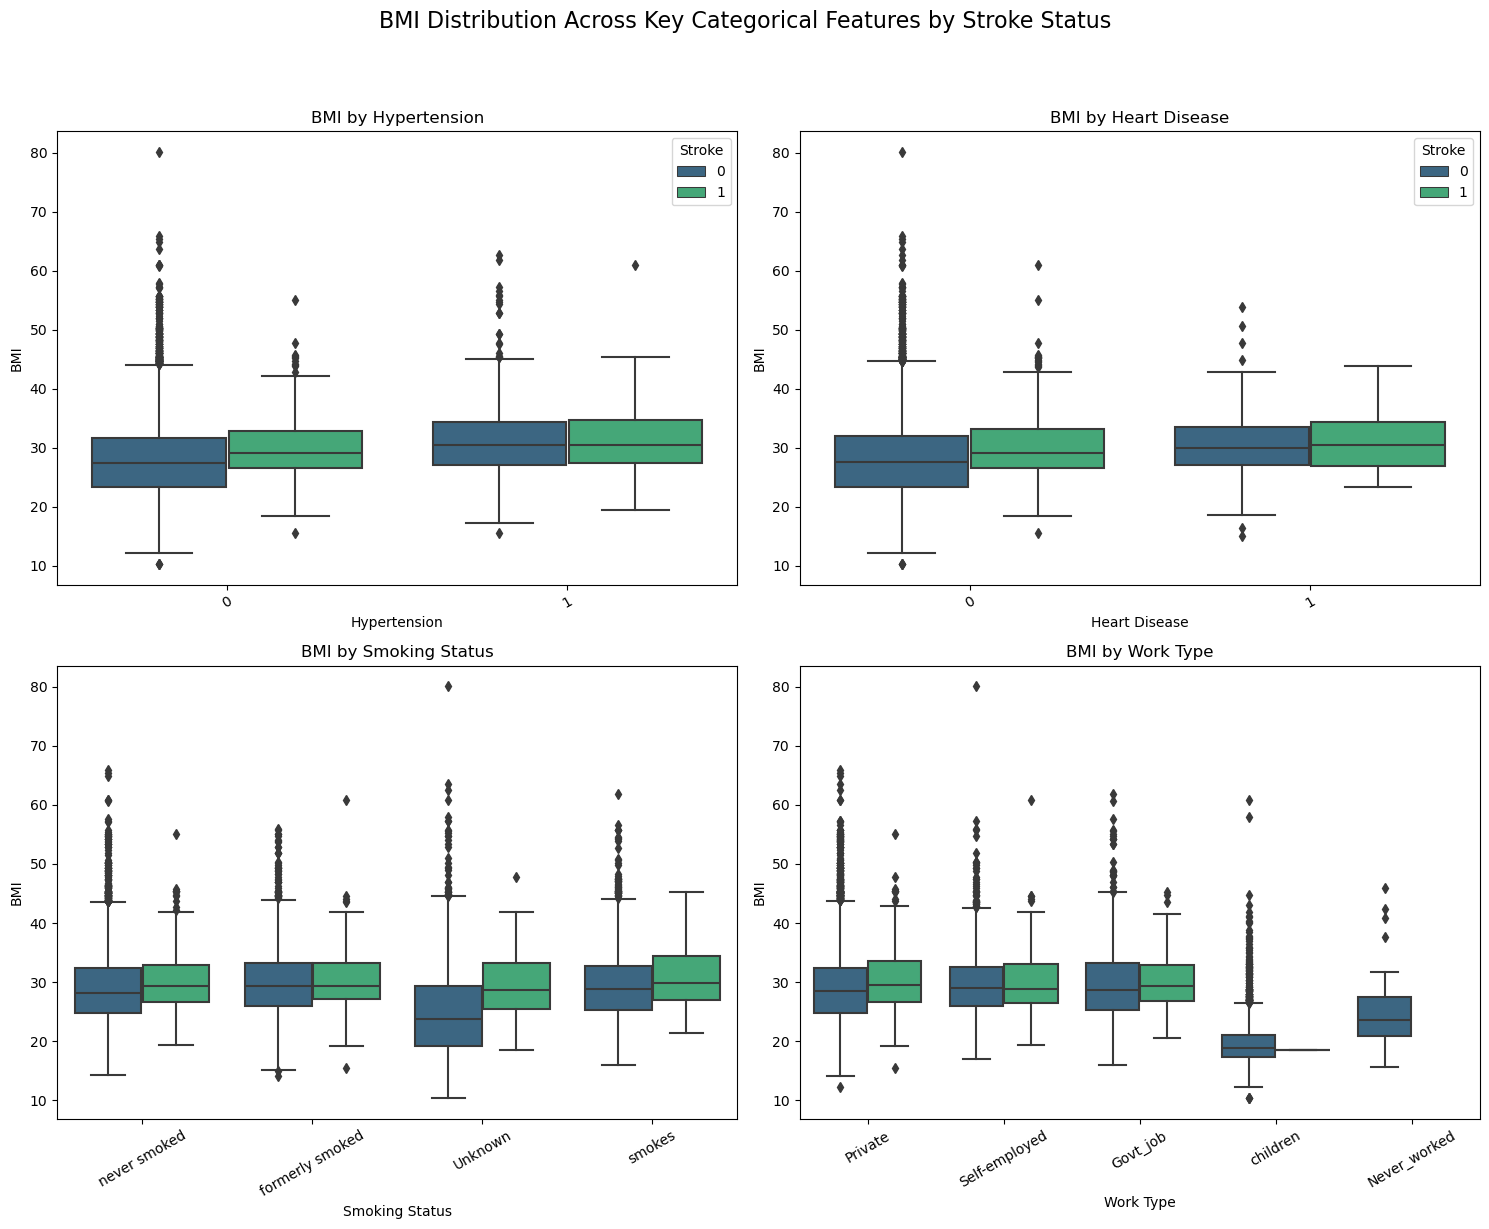


III. Categorical vs. Categorical Features (Interactions affecting Stroke)


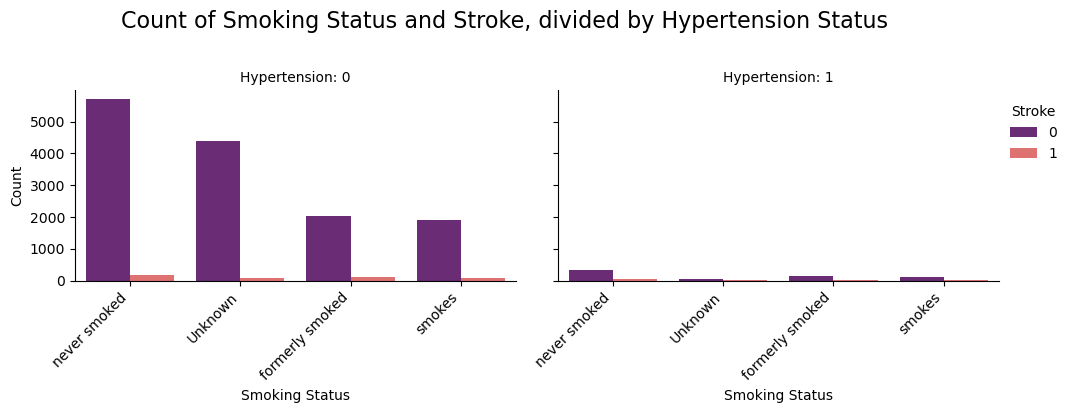

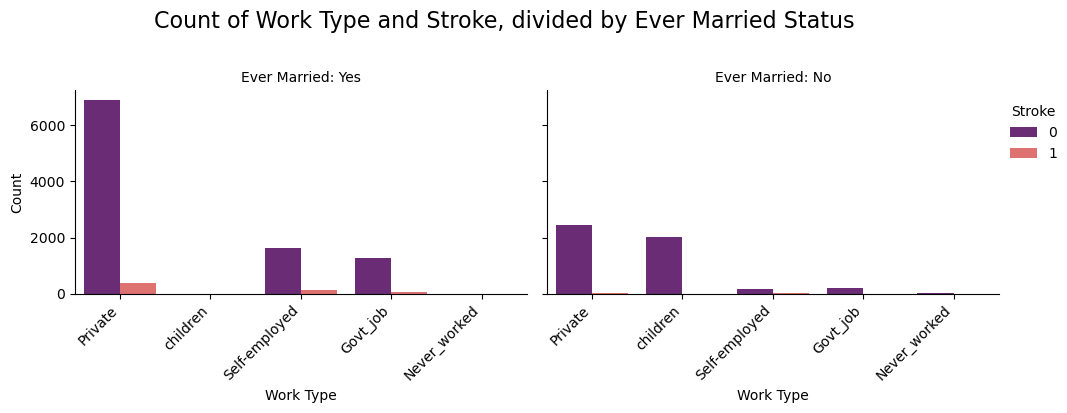

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary copy for plotting/analysis
df_plot = df.copy()

# Ensure plotting-related columns are string-typed (for hue/col in seaborn)
df_plot['stroke'] = df_plot['stroke'].astype(str)
df_plot['hypertension'] = df_plot['hypertension'].astype(str)
df_plot['heart_disease'] = df_plot['heart_disease'].astype(str)
df_plot['ever_married'] = df_plot['ever_married'].astype(str)

# Define feature lists
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features_important = ['hypertension', 'heart_disease', 'smoking_status', 'work_type']
categorical_features_lifestyle = ['ever_married', 'Residence_type']

print("\nBivariate and Multivariate Analysis")

# I. Numerical vs. Numerical Features
print("\nI. Numerical vs. Numerical Features")

# Pair Plot with Stroke Hue
print("\nGenerating Pair Plot (numerical features vs. each other, colored by Stroke)...")
sns.pairplot(df_plot[numerical_features + ['stroke']], hue='stroke', diag_kind='kde', palette='viridis', height=2.5)
plt.suptitle('Pair Plot of Numerical Features by Stroke Status', y=1.02, fontsize=16)
plt.show()

# Correlation Matrix Heatmaps
plt.figure(figsize=(14, 6))

# Pearson Correlation
plt.subplot(1, 2, 1)
pearson_corr = df_plot[numerical_features].corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix')

# Spearman Correlation
plt.subplot(1, 2, 2)
spearman_corr = df_plot[numerical_features].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix')

plt.tight_layout()
plt.show()

# II. Numerical vs. Categorical Features
print("\n### II. Numerical vs. Categorical Features (Grouped by Stroke)")

# Grouped Box Plots for Age
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Age Distribution Across Key Categorical Features by Stroke Status', fontsize=16, y=1.02)
axes = axes.flatten()

for i, cat_feat in enumerate(categorical_features_important):
    sns.boxplot(data=df_plot, x=cat_feat, y='age', hue='stroke', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Age by {cat_feat.replace("_", " ").title()}')
    axes[i].set_xlabel(cat_feat.replace("_", " ").title())
    axes[i].set_ylabel('Age')
    axes[i].tick_params(axis='x', rotation=30)
    if i in [0, 1]:
        axes[i].legend(title='Stroke', loc='upper right')
    else:
        axes[i].get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Grouped Box Plots for Average Glucose Level
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Avg Glucose Level Distribution Across Key Categorical Features by Stroke Status', fontsize=16, y=1.02)
axes = axes.flatten()

for i, cat_feat in enumerate(categorical_features_important):
    sns.boxplot(data=df_plot, x=cat_feat, y='avg_glucose_level', hue='stroke', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Avg Glucose Level by {cat_feat.replace("_", " ").title()}')
    axes[i].set_xlabel(cat_feat.replace("_", " ").title())
    axes[i].set_ylabel('Avg Glucose Level')
    axes[i].tick_params(axis='x', rotation=30)
    if i in [0, 1]:
        axes[i].legend(title='Stroke', loc='upper right')
    else:
        axes[i].get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Grouped Box Plots for BMI
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BMI Distribution Across Key Categorical Features by Stroke Status', fontsize=16, y=1.02)
axes = axes.flatten()

for i, cat_feat in enumerate(categorical_features_important):
    sns.boxplot(data=df_plot, x=cat_feat, y='bmi', hue='stroke', palette='viridis', ax=axes[i])
    axes[i].set_title(f'BMI by {cat_feat.replace("_", " ").title()}')
    axes[i].set_xlabel(cat_feat.replace("_", " ").title())
    axes[i].set_ylabel('BMI')
    axes[i].tick_params(axis='x', rotation=30)
    if i in [0, 1]:
        axes[i].legend(title='Stroke', loc='upper right')
    else:
        axes[i].get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# III. Categorical vs. Categorical Features (Stroke as focus)
print("\nIII. Categorical vs. Categorical Features (Interactions affecting Stroke)")

# Smoking Status vs. Stroke faceted by Hypertension
g = sns.catplot(
    data=df_plot,
    x='smoking_status',
    hue='stroke',
    col='hypertension',
    kind='count',
    palette='magma',
    height=4, aspect=1.2,
    order=df_plot['smoking_status'].value_counts().index
)
g.set_axis_labels("Smoking Status", "Count")
g.set_titles("Hypertension: {col_name}")
g.set_xticklabels(rotation=45, ha='right')
g._legend.set_title("Stroke")
g._legend.set_bbox_to_anchor((1.05, 0.7))
plt.suptitle('Count of Smoking Status and Stroke, divided by Hypertension Status', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Work Type vs. Stroke faceted by Ever Married
g = sns.catplot(
    data=df_plot,
    x='work_type',
    hue='stroke',
    col='ever_married',
    kind='count',
    palette='magma',
    height=4, aspect=1.2,
    order=df_plot['work_type'].value_counts().index
)
g.set_axis_labels("Work Type", "Count")
g.set_titles("Ever Married: {col_name}")
g.set_xticklabels(rotation=45, ha='right')
g._legend.set_title("Stroke")
g._legend.set_bbox_to_anchor((1.05, 0.7))
plt.suptitle('Count of Work Type and Stroke, divided by Ever Married Status', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


In [116]:
print("I. Numerical vs. Numerical Features")

print("Pair Plot (Age, Glucose, BMI):")
print("Stroke cases cluster around higher age and glucose levels, with BMI spread more widely.")
print("There's no strong linear relationship between glucose and BMI.\n")

print("Correlation Matrices (Pearson & Spearman):")
print("-Age moderately correlates with BMI and glucose, while glucose and BMI are weakly correlated.")
print("-The low inter-correlation suggests each feature adds independent value for stroke prediction.\n")


print("II. Numerical vs. Categorical (Grouped by Stroke Hue)")

print("Age by Categorical Features:")
print("-Stroke patients tend to be older, especially those with hypertension, heart disease, or who are self-employed/private workers.")
print("-Smoking history also correlates with higher age in stroke cases.\n")

print("Glucose by Categorical Features:")
print("-Higher glucose levels are found in stroke patients with hypertension, heart disease, and a history of smoking.")
print("-'Self-employed' and 'Private' also show slightly elevated levels.\n")

print("BMI by Categorical Features:")
print("-BMI is slightly higher in stroke patients, especially among those with hypertension, heart disease, or who smoke.")
print("-Work type differences are subtle but present.\n")


print("III. Categorical vs. Categorical Features")

print("-Smoking × Stroke faceted by Hypertension:")
print("-Stroke counts rise significantly among smokers with hypertension, showing a compounding risk effect when both factors are present.\n")

print("Work Type × Stroke faceted by Ever Married:")
print("-Stroke cases are notably higher among married individuals in 'Private' and 'Self-employed' jobs.")
print("-This possibly reflects age and lifestyle influences.")


I. Numerical vs. Numerical Features
Pair Plot (Age, Glucose, BMI):
Stroke cases cluster around higher age and glucose levels, with BMI spread more widely.
There's no strong linear relationship between glucose and BMI.

Correlation Matrices (Pearson & Spearman):
-Age moderately correlates with BMI and glucose, while glucose and BMI are weakly correlated.
-The low inter-correlation suggests each feature adds independent value for stroke prediction.

II. Numerical vs. Categorical (Grouped by Stroke Hue)
Age by Categorical Features:
-Stroke patients tend to be older, especially those with hypertension, heart disease, or who are self-employed/private workers.
-Smoking history also correlates with higher age in stroke cases.

Glucose by Categorical Features:
-Higher glucose levels are found in stroke patients with hypertension, heart disease, and a history of smoking.
-'Self-employed' and 'Private' also show slightly elevated levels.

BMI by Categorical Features:
-BMI is slightly higher in s

In [117]:
# Data Preparation & Preprocessing

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [118]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [119]:
input_cols = list(df.columns)[1:11]   ##features that we will use as inputs

In [120]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [121]:
target_col = 'stroke'   ##our target output column

In [122]:
train_inputs = df[input_cols].copy()
train_target = df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [123]:
##segresating numerical and categorical columns
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15303 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15303 non-null  int64  
 1   gender             15303 non-null  object 
 2   age                15303 non-null  float64
 3   hypertension       15303 non-null  int64  
 4   heart_disease      15303 non-null  int64  
 5   ever_married       15303 non-null  object 
 6   work_type          15303 non-null  object 
 7   Residence_type     15303 non-null  object 
 8   avg_glucose_level  15303 non-null  float64
 9   bmi                15303 non-null  float64
 10  smoking_status     15303 non-null  object 
 11  stroke             15303 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.5+ MB


In [125]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

##### Handling Categorical columns

In [126]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [127]:
categorical_cols.remove('smoking_status')

In [128]:
df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [129]:
##Ordinal encoding for smoke status column
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [130]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [131]:
# Defining a preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)   ##performing one hot encoding on categorical columns
]
)

In [132]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [133]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [134]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [135]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [136]:
##Defining X_train and Y_train 
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [137]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [138]:
##checking train and test have equal columns
X_train.shape[1] == X_test.shape[1]

True

In [139]:
# Split Dataset into training and validation set
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [141]:
X_train.shape

(12242, 17)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [143]:
##Listing the models to be evaluated
models = [
    (LogisticRegression(max_iter=1000), 'Logistic Regression'),
    (RandomForestClassifier(random_state=42), 'Random Forest'),
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 'XGBoost'),
    (LGBMClassifier(verbose=0), 'LightGBM')
]


In [144]:
#Function for evaluating models
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return cm, acc, prec, rec, f1

def metric_to_df(model_name, cm, acc, prec, rec, f1):
    return pd.DataFrame([[model_name, acc, prec, rec, f1]], 
                        columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1']), cm

In [145]:
##Evaluation metrics of various models to select the best
pre_balance_results = []
conf_matrices = {}

for model, name in models:
    model.fit(X_train, y_train)
    df, cm = metric_to_df(name + ' (Before)', *evaluate_model(model, X_val, y_val))
    pre_balance_results.append(df)
    conf_matrices[name + ' (Before)'] = cm

    print(f"\nModel: {name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)



Model: Logistic Regression
Accuracy : 0.7867
Precision: 0.1340
Recall   : 0.7090
F1 Score : 0.2254
Confusion Matrix:
[[2919    8]
 [ 130    4]]

Model: Random Forest
Accuracy : 0.7867
Precision: 0.1340
Recall   : 0.7090
F1 Score : 0.2254
Confusion Matrix:
[[2911   16]
 [ 126    8]]


d:\Python3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
Accuracy : 0.7867
Precision: 0.1340
Recall   : 0.7090
F1 Score : 0.2254
Confusion Matrix:
[[2906   21]
 [ 122   12]]

Model: LightGBM
Accuracy : 0.7867
Precision: 0.1340
Recall   : 0.7090
F1 Score : 0.2254
Confusion Matrix:
[[2914   13]
 [ 126    8]]


In [146]:
##Our dataset is highly imbalanced since non stroke cases are very higher than stroke cases.
##so to increase the value of recall , we are performing resampling using SMOTE
balancer = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = balancer.fit_resample(X_train, y_train)

print("\nClass distribution before balancing:", y_train.value_counts().to_dict())
print("Class distribution after balancing:", y_train_balanced.value_counts().to_dict())



Class distribution before balancing: {0: 11744, 1: 498}
Class distribution after balancing: {0: 11744, 1: 11744}


In [147]:
post_balance_results = []

print("\nModel Evaluation AFTER Balancing (SMOTE Applied):\n" + "-"*60)

for model, name in models:
    model.fit(X_train_balanced, y_train_balanced)
    cm, acc, prec, rec, f1 = evaluate_model(model, X_val, y_val)
    
    # Store results
    df, _ = metric_to_df(name + ' (After)', cm, acc, prec, rec, f1)
    post_balance_results.append(df)
    conf_matrices[name + ' (After)'] = cm
    
    # Print results
    print(f"\nModel: {name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    


Model Evaluation AFTER Balancing (SMOTE Applied):
------------------------------------------------------------


d:\Python3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Logistic Regression
Accuracy : 0.7844
Precision: 0.1317
Recall   : 0.7015
F1 Score : 0.2217
Confusion Matrix:
[[2307  620]
 [  40   94]]

Model: Random Forest
Accuracy : 0.9520
Precision: 0.3143
Recall   : 0.0821
F1 Score : 0.1302
Confusion Matrix:
[[2903   24]
 [ 123   11]]


d:\Python3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
Accuracy : 0.9503
Precision: 0.3333
Recall   : 0.1343
F1 Score : 0.1915
Confusion Matrix:
[[2891   36]
 [ 116   18]]

Model: LightGBM
Accuracy : 0.9510
Precision: 0.3182
Recall   : 0.1045
F1 Score : 0.1573
Confusion Matrix:
[[2897   30]
 [ 120   14]]


In [148]:
print("Model Selection:\n")

print("Prioritising recall:")
print("-In stroke prediction, missing actual stroke cases can be life-threatening.")
print("-Therefore, recall (sensitivity) is more important than accuracy or precision.")

print("\nLogistic Regression model was Selected:")
print("-Achieved the highest recall (70.15%) among all models after SMOTE.")
print("-Has the best F1 Score (0.22), balancing precision and recall.")
print("-Provides model transparency — useful in clinical decision-making.")


Model Selection:

Prioritising recall:
-In stroke prediction, missing actual stroke cases can be life-threatening.
-Therefore, recall (sensitivity) is more important than accuracy or precision.

Logistic Regression model was Selected:
-Achieved the highest recall (70.15%) among all models after SMOTE.
-Has the best F1 Score (0.22), balancing precision and recall.
-Provides model transparency — useful in clinical decision-making.


#### Hyperparameter Tuning on Logistic regression model

In [149]:
# Defining the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Setting up the model
logreg = LogisticRegression(max_iter=1000)

# Setting up GridSearchCV
logreg_grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on balanced training data
logreg_grid.fit(X_train_balanced, y_train_balanced)

# Getting best model
best_logreg = logreg_grid.best_estimator_
print("\nBest Logistic Regression Parameters:")
print(logreg_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best Logistic Regression Parameters:
{'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [150]:
#Final Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_logreg.predict(X_val)
print("\nEvaluation of Tuned Logistic Regression:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Evaluation of Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      2927
           1       0.13      0.71      0.23       134

    accuracy                           0.79      3061
   macro avg       0.56      0.75      0.55      3061
weighted avg       0.95      0.79      0.85      3061

Confusion Matrix:
[[2313  614]
 [  39   95]]


In [155]:
# Using the best model to make prediction on validation set
y_pred = best_logreg.predict(X_val)

# Calculate individual metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

# Print metrics
print("Evaluation Metrics After Tuning:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Full classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Evaluation Metrics After Tuning:
Accuracy : 0.7867
Precision: 0.1340
Recall   : 0.7090
F1 Score : 0.2254

Confusion Matrix:
[[2313  614]
 [  39   95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      2927
           1       0.13      0.71      0.23       134

    accuracy                           0.79      3061
   macro avg       0.56      0.75      0.55      3061
weighted avg       0.95      0.79      0.85      3061



In [159]:
#Making predictions using our test data
y_test_pred = best_logreg.predict(X_test)

In [160]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)